*For in-depth explanations of sensitivities please refer to the PDF write-up.*

In [6]:
import pandas as pd
import numpy as np
import concurrent.futures
import matplotlib.pyplot as plt
import pymodule.grapher as gp
from main import main
%matplotlib inline

In [2]:
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    futures = {RR: executor.submit(main, n_simulations=1000000, RR=RR, return_df=True) 
               for RR in np.arange(0, 1, 0.05)}

In [3]:
frames = [future.result().assign(**{"RR": RR}) for RR, future in futures.items()]
df = pd.concat(frames).reset_index()
df["distribution_type"] = df["distribution_type"].map(lambda x: "students_t" if "students_t" in x else x)
df = df.groupby(["RR", "distribution_type"])[[1, 2, 3, 4, 5]].mean().reset_index()

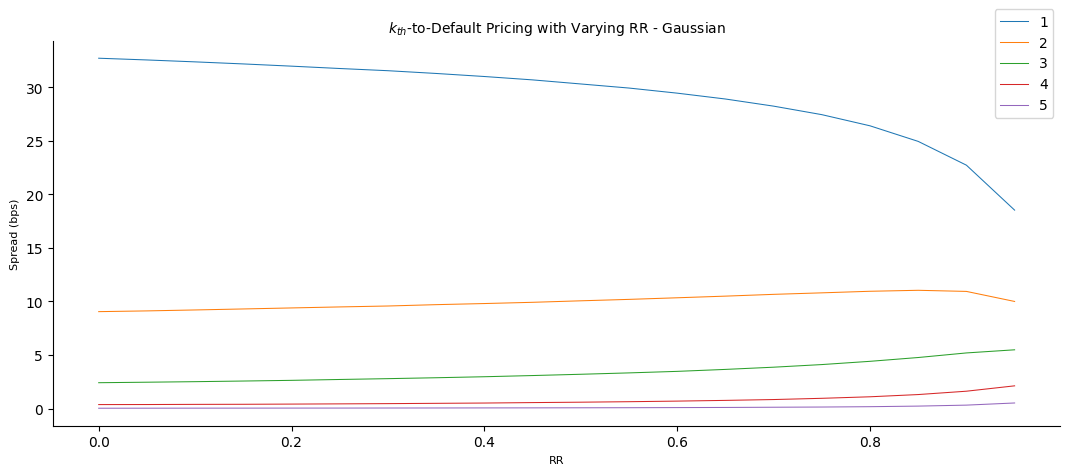

In [4]:
df_gaussian = df.loc[df["distribution_type"] == "gaussian"].copy().drop("distribution_type", axis=1).set_index("RR")
gp.graph(
    df=df_gaussian*10000,
    cols=df_gaussian.columns,
    kind=plt.plot,
    figsize=(13, 5),
    title=r"$k_{th}$-to-Default Pricing with Varying RR - Gaussian",
    xlabel="RR",
    ylabel="Spread (bps)",
    lw=0.75
)

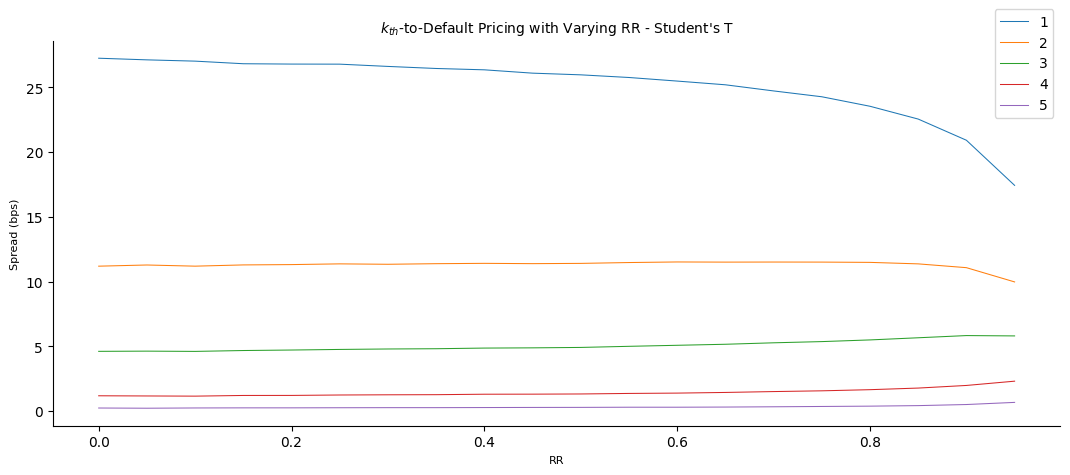

In [5]:
df_students_t = df.loc[df["distribution_type"] == "students_t"].copy().drop("distribution_type", axis=1).set_index("RR")
gp.graph(
    df=df_students_t*10000,
    cols=df_students_t.columns,
    kind=plt.plot,
    figsize=(13, 5),
    title=r"$k_{th}$-to-Default Pricing with Varying RR - Student's T",
    xlabel="RR",
    ylabel="Spread (bps)",
    lw=0.75
)